
# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We are going today to investigate the 'no-show appointments' data set. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The data set is represented by the following columns name:
#patient_id: Patient Identification Number
#gender: Gender of the patient
#scheduled_day: The date of scheduling
#appointment_day: The date of the appointment
#age: age of the patient
#neighborhood: Area where the patient lives
#scholarship: Indicates whether or not the patient is enrolled in the Brasilian welfare program
#hypertension: Patients who suffer from hypertension
#diabetes: Patients who suffer from diabetes
#alcoholism: Patients who suffer from alcoholic addiction
#handicap: Patients who suffer from a kind of disability
#sms_received: Patients whos received SMS message before the appointment
#no_show:  It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 
#ad_day_of_week: Converting the date to day_name
#age_groups: converting age to groups to be easily identified on graphs and I categorize them using the reference below
#https://bmcneurol.biomedcentral.com/articles/10.1186/s12883-020-01888-w
#the classification criteria based on the age for glioma patients were 
#0–14 years old (pediatric group), 
#15–47 years old (youth group), 
#48–63 years old (middle-aged group) 
#and ≥ 64 years old (elderly group).
#scheduling_period: The difference between scheduling day and the appointment day
#scheduling_period_groups: Categorizing the scheduling period to same_day, same_week, and more than a month



### Question(s) for Analysis
### Q1 Do scholarships affect patients to show up for their appointment?
### Q2 What is the most day of the week patients show up for an appointment?
### Q3 What age group showing the most for an appointment?
### Q4 What neighborhood has the highest medical appointments?
### Q5 Do SMS messages affect patients showing up?
### Q6 Is the difference between scheduling date and appointment date affect how patients showing up?
### Q7 Is gender is a factor for showing up?
### Q8 do handicapped patients' disabilities affecting their visits?
### Q9 What age group affected more who suffering from diabetes, alcoholism, and hypertension?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.columns = df.columns.str.lower()  ### lower the column characters to be easier to work with

In [7]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])         ###change scheduledday and appoitmentday data type from string to date time
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [9]:
df.duplicated().sum() #checking duplicates

0

In [10]:
df.describe() #checking data set

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


'age' column has value -1 then change all -1 to zero

In [11]:
age_index = df.query('age <= -1').index ## investigating age values = -1
df.query('age <= -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
for i in age_index: ## changing -1 to 1
    print(i)
    df.at[i,'age']=0

99832


In [13]:
df.query('age <= -1') # checking is therir any -1 values

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [14]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
df.drop(['appointmentid'], axis=1, inplace=True) ### no need for appointment id as there is no information we can get from it

In [16]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
df.duplicated().sum() ## checking duplicates again

618

In [18]:
df[df.duplicated()]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
154,1.925263e+10,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30,ITARARÉ,0,0,0,0,0,0,No
369,4.341600e+14,F,2016-04-29 09:43:15+00:00,2016-04-29 00:00:00+00:00,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4.497415e+09,F,2016-04-19 11:16:27+00:00,2016-04-29 00:00:00+00:00,11,BELA VISTA,0,0,0,0,0,0,No
466,5.161239e+12,F,2016-04-27 13:16:02+00:00,2016-04-29 00:00:00+00:00,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,4.916356e+12,M,2016-03-29 12:40:26+00:00,2016-04-29 00:00:00+00:00,40,CENTRO,0,0,0,0,0,0,Yes
840,5.439872e+11,M,2016-04-28 09:56:07+00:00,2016-04-29 00:00:00+00:00,8,CENTRO,0,0,0,0,0,0,No
1554,7.695326e+12,F,2016-04-29 16:12:47+00:00,2016-04-29 00:00:00+00:00,13,DA PENHA,0,0,0,0,0,0,Yes
1557,1.144472e+12,F,2016-04-15 14:35:51+00:00,2016-04-29 00:00:00+00:00,21,BENTO FERREIRA,0,0,0,0,0,0,Yes
1558,1.144472e+12,F,2016-04-15 14:35:51+00:00,2016-04-29 00:00:00+00:00,21,BENTO FERREIRA,0,0,0,0,0,0,Yes
1661,8.854170e+12,F,2016-04-06 09:59:03+00:00,2016-04-29 00:00:00+00:00,81,SANTA MARTHA,0,0,0,0,0,0,No


In [19]:
# rename columns
df.rename(columns={'patientid': 'patient_id', 'scheduledday': 'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap', 'no-show':'no_show'  },inplace=True)

In [20]:
df.head(0)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [21]:
# changing "no_show" column to bool so 'No' will be False and 'Yes' will be True
df['no_show'].replace({'No': 0 , 'Yes':1}, inplace=True)
df['no_show'] = df['no_show'].astype('bool')
df.head()
#df.query('no_show == True')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
patient_id         110527 non-null float64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null bool
dtypes: bool(1), datetime64[ns, UTC](2), float64(1), int64(7), object(2)
memory usage: 10.2+ MB


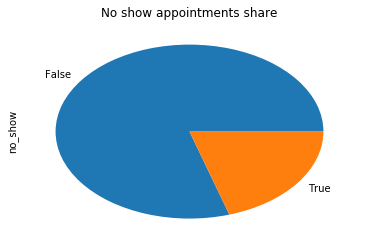

In [22]:
# pie chart illustation no_show values
df['no_show'].value_counts().plot(kind = 'pie' );
plt.title('No show appointments share');

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  Do scholarships affect patients to show up for their appointment?

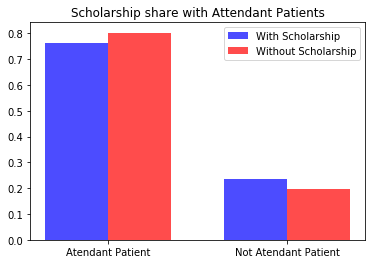

In [23]:
# grouping no_show with scholarship to investigate the effect of scholarship on medical appointments
#df_s = df.groupby(['scholarship','no_show']).count()
df_s = df.groupby(['scholarship','no_show']).count()['patient_id']
df_s_total = df.groupby('scholarship').count()['patient_id']
df_s_total
no_show_prop = df_s[1] / df_s_total[1]
no_show_prop
no_no_show_prop = df_s[0] / df_s_total[0]
width = 0.35
ind = np.arange(len(no_show_prop))
no_show_bars = plt.bar(ind, no_show_prop, 0.35, color='b', alpha=.7, label='With Scholarship')
no_no_show_bars = plt.bar(ind + 0.35, no_no_show_prop, 0.35, color='r', alpha=.7, label='Without Scholarship')
locations = ind + width / 2  # xtick locations
labels = ['Atendant Patient', 'Not Atendant Patient']  # xtick labels
plt.xticks(locations, labels)
plt.title('Scholarship share with Attendant Patients');
# legend
plt.legend()
#no_show_prop


Scholarship nearly do not affect no_show patients maybe because they are way less than nonscholarship patients

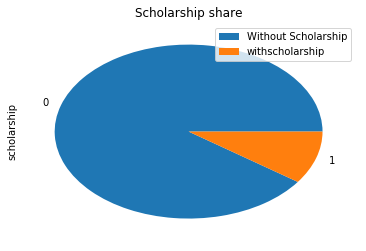

In [24]:
df['scholarship'].value_counts().plot(kind = 'pie' );
plt.title('Scholarship share');
plt.legend( ['Without Scholarship', 'withscholarship']);

### Research Question 2:  What is the most day of the week patients show up for an appointment?

In [25]:
df['ad_day_of_week'] = df['appointment_day'].dt.day_name() ## convert appointment day to day name and make a new column


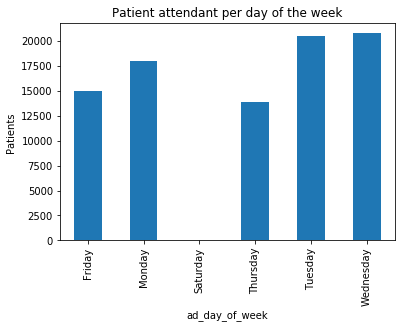

In [26]:
df_ad = df.query('no_show == False')
df_ad = df_ad.groupby('ad_day_of_week').count()
df_ad
df_ad['patient_id'].plot(kind = 'bar');
plt.title('Patient attendant per day of the week');
plt.ylabel('Patients ');

Wednesday and Tuesday are the most days crowded by patients

### Research Question 3:  What age group showing the most for an appointment?

In [27]:
#I divide the age to groups to be easily identified on graphs and I categorize them using the reference below
#https://bmcneurol.biomedcentral.com/articles/10.1186/s12883-020-01888-w
#the classification criteria based on the age for glioma patients were 
#0–14 years old (pediatric group), 
#15–47 years old (youth group), 
#48–63 years old (middle-aged group) 
#and ≥ 64 years old (elderly group).
bin_edges = [0,15,48,64,150]
bin_names = ['pediatric', 'youth','middle age ','elderly']
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [28]:
df_ag = df.query('no_show == False')
df_ag = df_ag.groupby('age_groups').count()
df_ag

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,ad_day_of_week
age_groups,,,,,,,,,,,,,,
pediatric,16320,16320,16320,16320,16320,16320,16320,16320,16320,16320,16320,16320,16320,16320
youth,36615,36615,36615,36615,36615,36615,36615,36615,36615,36615,36615,36615,36615,36615
middle age,20203,20203,20203,20203,20203,20203,20203,20203,20203,20203,20203,20203,20203,20203
elderly,12169,12169,12169,12169,12169,12169,12169,12169,12169,12169,12169,12169,12169,12169


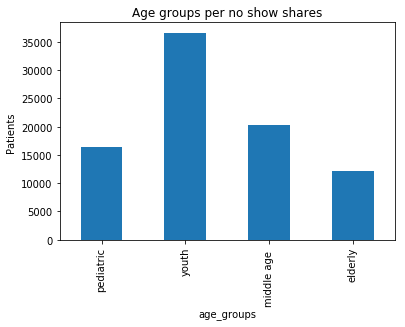

In [29]:
df_ag['patient_id'].plot(kind = 'bar');
plt.title('Age groups per no show shares');
plt.ylabel('Patients ');

The youth or the young group from 14 to 47 are the most age group who showed up

### Research Question 4:  What neighborhood has the highest medical appointments?

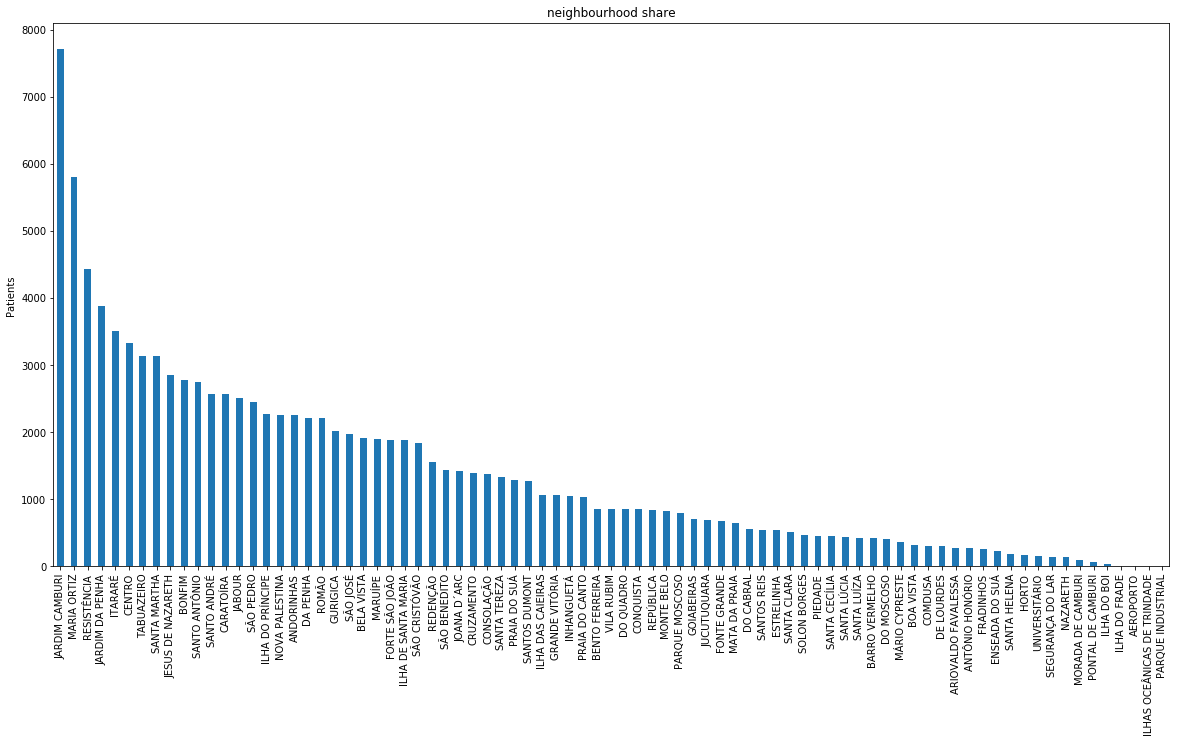

In [30]:
df['neighbourhood'].value_counts().plot(kind = 'bar' , figsize=(20,10));
plt.title('neighbourhood share');
plt.ylabel('Patients ');

In [31]:
df_ge = df.groupby(['no_show','neighbourhood']).count() ### Creating graphical distribution for the neighborhood who showed up
df_ge = df_ge.query('no_show == False')
df_ge

patient_id  gender  scheduled_day  \
no_show neighbourhood                                            
False   AEROPORTO                     7       7              7   
        ANDORINHAS                 1741    1741           1741   
        ANTÔNIO HONÓRIO             221     221            221   
        ARIOVALDO FAVALESSA         220     220            220   
        BARRO VERMELHO              332     332            332   
...                                 ...     ...            ...   
        SÃO JOSÉ                   1549    1549           1549   
        SÃO PEDRO                  1933    1933           1933   
        TABUAZEIRO                 2559    2559           2559   
        UNIVERSITÁRIO               120     120            120   
        VILA RUBIM                  710     710            710   

                             appointment_day   age  scholarship  hypertension  \
no_show neighbourhood                                                           
False   AEROPORTO                          7     7            7             7   
        ANDORINHAS                      1741  1741         1741          1741   
        ANTÔNIO HONÓRIO                  221   221          221           221   
        ARIOVALDO FAVALESSA              220   220          220           220   
        BARRO VERMELHO                   332   332          332           332   
...                                      ...   ...          ...           ...   
        SÃO JOSÉ                        1549  1549         1549          1549   
        SÃO PEDRO                       1933  1933         1933          1933   
        TABUAZEIRO                      2559  2559         2559          2559   
        UNIVERSITÁRIO                    120   120          120           120   
        VILA RUBIM                       710   710          710           710   

                             diabetes  alcoholism  handicap  sms_received  \
no_show neighbourhood                                                       
False   AEROPORTO                   7           7         7             7   
        ANDORINHAS               1741        1741      1741          1741   
        ANTÔNIO HONÓRIO           221         221       221           221   
        ARIOVALDO FAVALESSA       220         220       220           220   
        BARRO VERMELHO            332         332       332           332   
...                               ...         ...       ...           ...   
        SÃO JOSÉ                 1549        1549      1549          1549   
        SÃO PEDRO                1933        1933      1933          1933   
        TABUAZEIRO               2559        2559      2559          2559   
        UNIVERSITÁRIO             120         120       120           120   
        VILA RUBIM                710         710       710           710   

                             ad_day_of_week  age_groups  
no_show neighbourhood                                    
False   AEROPORTO                         7           7  
        ANDORINHAS                     1741        1686  
        ANTÔNIO HONÓRIO                 221         212  
        ARIOVALDO FAVALESSA             220         207  
        BARRO VERMELHO                  332         327  
...                                     ...         ...  
        SÃO JOSÉ                       1549        1461  
        SÃO PEDRO                      1933        1849  
        TABUAZEIRO                     2559        2467  
        UNIVERSITÁRIO                   120         119  
        VILA RUBIM                      710         690  

[80 rows x 13 columns]

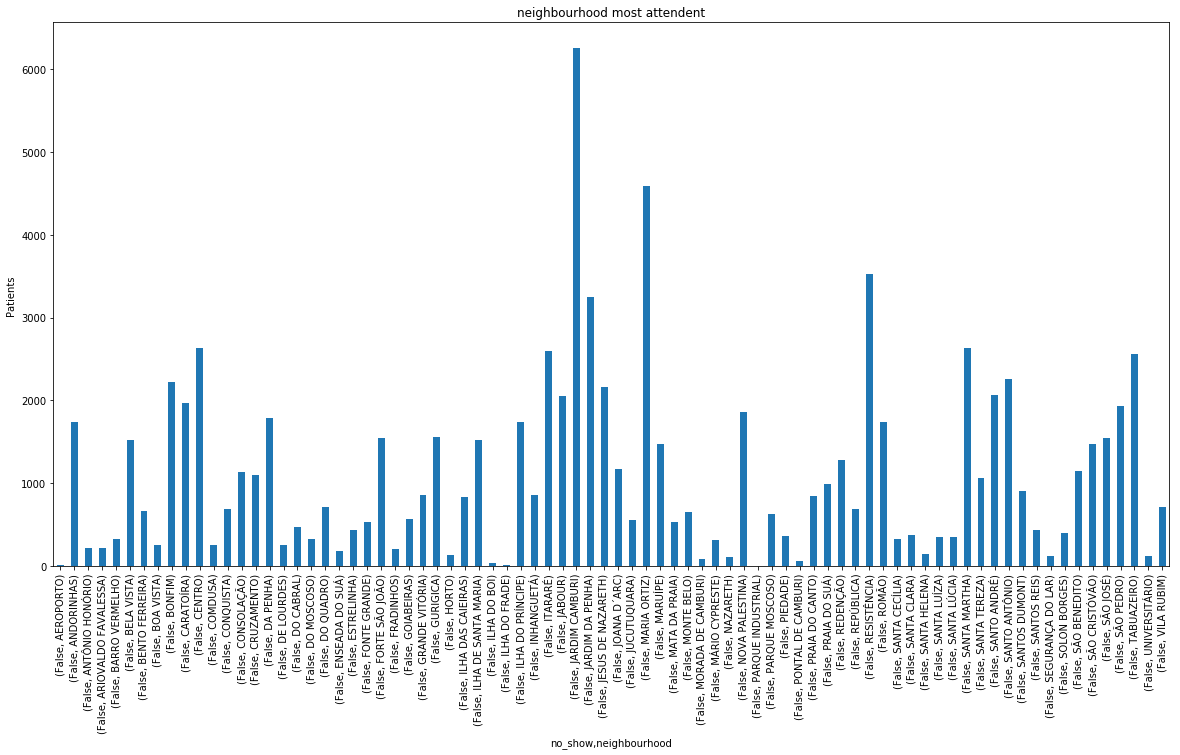

In [32]:
df_ge['patient_id'].plot(kind='bar', figsize=(20,10));
plt.title('neighbourhood most attendent');
plt.ylabel('Patients ');

There is some limitation in neighborhood data. We don't know the population density per neighbourhood or the average distance traveled between the patient and the medical center. The most showed up neighborhood "Jardim Camburi"

### Research Question 5:  Do SMS messages affect patients showing up?

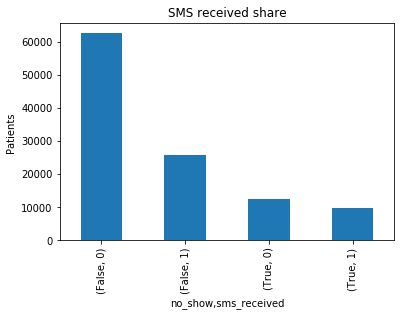

In [33]:
df_sms = df.groupby(['no_show','sms_received']).count()
df_sms['patient_id'].plot(kind = 'bar');
plt.title('SMS received share');
plt.ylabel('Patients ');

In [34]:
df_sms_rec = df.groupby(['sms_received','no_show']).count()

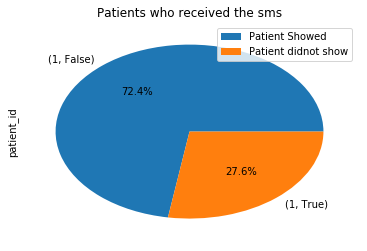

In [35]:
df_sms_rec_attend = df_sms_rec.query('sms_received == 1')
df_sms_rec_attend
total_attended_patient = df_sms_rec_attend['patient_id'].sum()
total_attended_patient
df_sms_rec_attend = df_sms_rec_attend/total_attended_patient
df_sms_rec_attend

df_sms_rec_attend['patient_id'].plot.pie(autopct='%1.1f%%');
plt.title('Patients who received the sms');
plt.legend( ['Patient Showed', 'Patient didnot show']);

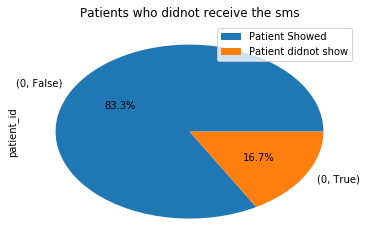

In [36]:
df_sms_rec_attend_t = df_sms_rec.query('sms_received == 0')
df_sms_rec_attend_t
total_attended_scholar_t = df_sms_rec_attend_t['patient_id'].sum()
total_attended_scholar_t
df_sms_rec_attend_t = df_sms_rec_attend_t/total_attended_scholar_t
df_sms_rec_attend_t
df_sms_rec_attend_t['patient_id'].plot.pie(autopct='%1.1f%%');
plt.title('Patients who didnot receive the sms');
plt.legend( ['Patient Showed', 'Patient didnot show']);

An unexpected result appeared as there are a decrease in the patients who received the SMS message

### Research Question 6: Is the difference between scheduling date and appointment date affect how patients showing up?

In [37]:
df['scheduling_period'] = (df['appointment_day']-df['scheduled_day']).dt.days
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,ad_day_of_week,age_groups,scheduling_period
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,Friday,middle age,-1


In [38]:
# Dividing the difference into groups
bin_edges = [-10,0,7,31,180]
bin_names = ['same_day', 'less_than_week','less_than_month ','more_than_month']
df['scheduling_period_groups'] = pd.cut(df['scheduling_period'], bin_edges, labels=bin_names)

In [39]:
df_sg = df.query('no_show == False')
df_sg = df_sg.groupby(['scheduling_period_groups']).count()
df_sg

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,ad_day_of_week,age_groups,scheduling_period
scheduling_period_groups,,,,,,,,,,,,,,,,
same_day,40871,40871,40871,40871,40871,40871,40871,40871,40871,40871,40871,40871,40871,40871,39366,40871
less_than_week,21975,21975,21975,21975,21975,21975,21975,21975,21975,21975,21975,21975,21975,21975,21508,21975
less_than_month,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,18533,19241
more_than_month,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,5900,6121


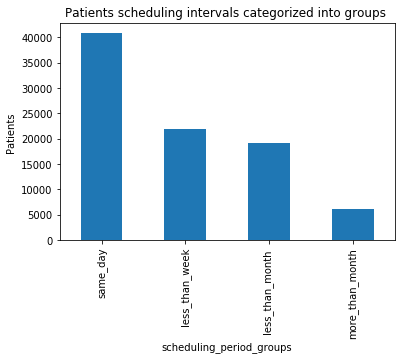

In [40]:
df_sg['patient_id'].plot(kind = 'bar');
plt.title('Patients scheduling intervals categorized into groups ');
plt.ylabel('Patients ');

Most patients who showed are the patients who scheduled an appointment in the same day

### Research Question 7: Is gender is a factor for showing up?

In [41]:
df_gender = df.groupby(['no_show','gender']).count()
df_gender

patient_id  scheduled_day  appointment_day    age  \
no_show gender                                                      
False   F            57246          57246            57246  57246   
        M            30962          30962            30962  30962   
True    F            14594          14594            14594  14594   
        M             7725           7725             7725   7725   

                neighbourhood  scholarship  hypertension  diabetes  \
no_show gender                                                       
False   F               57246        57246         57246     57246   
        M               30962        30962         30962     30962   
True    F               14594        14594         14594     14594   
        M                7725         7725          7725      7725   

                alcoholism  handicap  sms_received  ad_day_of_week  \
no_show gender                                                       
False   F            57246     57246         57246           57246   
        M            30962     30962         30962           30962   
True    F            14594     14594         14594           14594   
        M             7725      7725          7725            7725   

                age_groups  scheduling_period  scheduling_period_groups  
no_show gender                                                           
False   F            55843              57246                     57246  
        M            29464              30962                     30962  
True    F            14275              14594                     14594  
        M             7405               7725                      7725

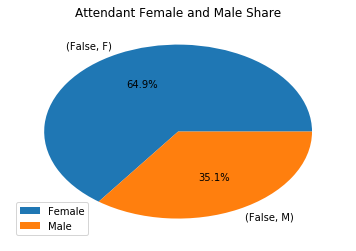

In [42]:
df_gender_attend = df_gender.query('no_show == False')
df_gender_attend
total_gender_attend = df_gender_attend['patient_id'].sum()
total_gender_attend
df_gender_attend = df_gender_attend/total_gender_attend
df_gender_attend
df_gender_attend['patient_id'].plot.pie(autopct='%1.1f%%', label='');
plt.title('Attendant Female and Male Share');
plt.legend( ['Female', 'Male']);

Female patients are attending more the Male patient's

In [43]:
## analyzing each gender type individually
df_f=df[df['gender'].str.contains('F')]
df_m=df[df['gender'].str.contains('M')]

In [44]:
df_gender_female = df_f.groupby(['gender','no_show']).count()
df_gender_male = df_m.groupby(['gender','no_show']).count()
df_gender_male

patient_id  scheduled_day  appointment_day    age  \
gender no_show                                                      
M      False         30962          30962            30962  30962   
       True           7725           7725             7725   7725   

                neighbourhood  scholarship  hypertension  diabetes  \
gender no_show                                                       
M      False            30962        30962         30962     30962   
       True              7725         7725          7725      7725   

                alcoholism  handicap  sms_received  ad_day_of_week  \
gender no_show                                                       
M      False         30962     30962         30962           30962   
       True           7725      7725          7725            7725   

                age_groups  scheduling_period  scheduling_period_groups  
gender no_show                                                           
M      False         29464              30962                     30962  
       True           7405               7725                      7725

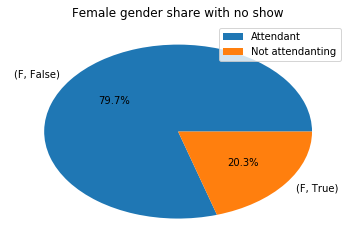

In [45]:
female_total = df_gender_female['patient_id'].sum()
df_gender_female = df_gender_female /female_total
df_gender_female['patient_id'].plot.pie(autopct='%1.1f%%', label='')
plt.title('Female gender share with no show');
plt.legend( ['Attendant', 'Not attendanting']);

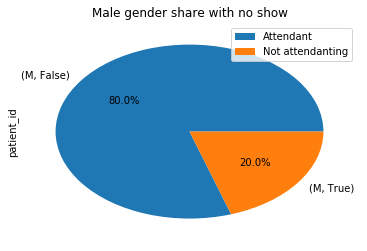

In [46]:
male_total = df_gender_male['patient_id'].sum()
df_gender_male = df_gender_male /male_total
df_gender_male['patient_id'].plot.pie(autopct='%1.1f%%')
plt.title('Male gender share with no show');
plt.legend( ['Attendant', 'Not attendanting']);

nearly the same the two gender types are showing with the same ratio in their gender

### Research Question 8: do handicapped patients' disabilities affecting their visits?

In [47]:
df_handicap = df.loc[df['handicap'] > 0]

In [48]:
df_hand = df_handicap.groupby(['no_show','handicap']).count()
df_hand

patient_id  gender  scheduled_day  appointment_day   age  \
no_show handicap                                                             
False   1               1676    1676           1676             1676  1676   
        2                146     146            146              146   146   
        3                 10      10             10               10    10   
        4                  2       2              2                2     2   
True    1                366     366            366              366   366   
        2                 37      37             37               37    37   
        3                  3       3              3                3     3   
        4                  1       1              1                1     1   

                  neighbourhood  scholarship  hypertension  diabetes  \
no_show handicap                                                       
False   1                  1676         1676          1676      1676   
        2                   146          146           146       146   
        3                    10           10            10        10   
        4                     2            2             2         2   
True    1                   366          366           366       366   
        2                    37           37            37        37   
        3                     3            3             3         3   
        4                     1            1             1         1   

                  alcoholism  sms_received  ad_day_of_week  age_groups  \
no_show handicap                                                         
False   1               1676          1676            1676        1675   
        2                146           146             146         146   
        3                 10            10              10          10   
        4                  2             2               2           2   
True    1                366           366             366         366   
        2                 37            37              37          37   
        3                  3             3               3           3   
        4                  1             1               1           1   

                  scheduling_period  scheduling_period_groups  
no_show handicap                                               
False   1                      1676                      1676  
        2                       146                       146  
        3                        10                        10  
        4                         2                         2  
True    1                       366                       366  
        2                        37                        37  
        3                         3                         3  
        4                         1                         1

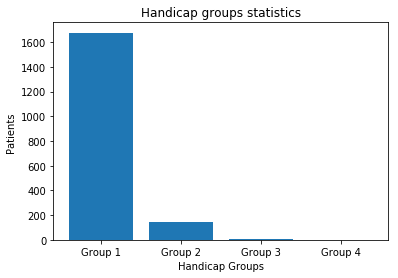

In [49]:
heights = df_hand.query('no_show == False')['patient_id']
locations = [1,2,3,4]
labels = ['Group 1', 'Group 2', 'Group 3','Group 4']
plt.bar(locations, heights, tick_label=labels)
plt.ylabel('Patients ');
plt.xlabel('Handicap Groups');
plt.title('Handicap groups statistics');

Handicap patient who has one disability is easier to show up than who has more than one disability 

### Research Question 9: What age group affected more who suffering from diabetes, alcoholism, and hypertension?

In [50]:
df_hyper = df.loc[(df['no_show']==False) & (df['hypertension']==1)]

df_hyper.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,ad_day_of_week,age_groups,scheduling_period,scheduling_period_groups
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,Friday,middle age,-1,same_day
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,False,Friday,middle age,-1,same_day
5,9.598513e+13,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,False,Friday,elderly,1,less_than_week
25,5.819370e+12,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,False,Friday,youth,2,less_than_week
26,2.578785e+10,F,2016-04-29 14:19:42+00:00,2016-04-29 00:00:00+00:00,45,BENTO FERREIRA,0,1,0,0,0,0,False,Friday,youth,-1,same_day


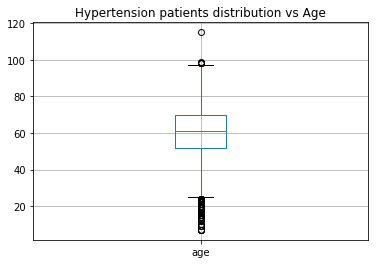

In [51]:

df_hyper.boxplot(column=['age']);
plt.title('Hypertension patients distribution vs Age');

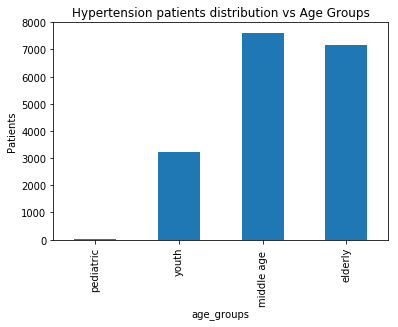

In [52]:
df_hyper = df.loc[(df['no_show']==False) & (df['hypertension']==1)]
df_hyper = df_hyper.groupby(['age_groups']).count()
df_hyper
df_hyper['patient_id'].plot(kind = 'bar');
plt.title('Hypertension patients distribution vs Age Groups');
plt.ylabel('Patients');

In [53]:
df_diab = df.loc[(df['no_show']==False) & (df['diabetes']==1)]
#df_diab = df_diab.groupby(['age']).count()
df_diab.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,ad_day_of_week,age_groups,scheduling_period,scheduling_period_groups
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,False,Friday,middle age,-1,same_day
36,7.298459e+13,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,False,Friday,middle age,-1,same_day
37,1.578132e+12,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,False,Friday,middle age,-1,same_day
41,8.224325e+14,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARUÍPE,0,0,1,0,0,0,False,Friday,elderly,0,same_day
47,5.894585e+11,F,2016-04-28 08:51:26+00:00,2016-04-29 00:00:00+00:00,39,MARUÍPE,0,1,1,0,0,0,False,Friday,youth,0,same_day


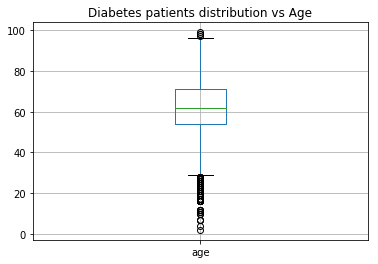

In [54]:
df_diab.boxplot(column=['age']);
plt.title('Diabetes patients distribution vs Age');

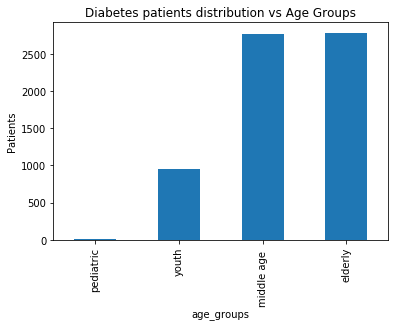

In [55]:
df_diab = df.loc[(df['no_show']==False) & (df['diabetes']==1)]
df_diab = df_diab.groupby(['age_groups']).count()
df_diab['patient_id'].plot(kind = 'bar');
plt.title('Diabetes patients distribution vs Age Groups');
plt.ylabel('Patients');

In [56]:
df_alco= df.loc[(df['no_show']==False) & (df['alcoholism']==1)]
#df_alco = df_alco.groupby(['age']).count()
df_alco.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,ad_day_of_week,age_groups,scheduling_period,scheduling_period_groups
46,1.379437e+11,M,2016-04-25 12:44:36+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,False,Friday,middle age,3,less_than_week
133,3.587186e+12,M,2016-04-14 07:07:10+00:00,2016-04-29 00:00:00+00:00,69,PRAIA DO SUÁ,0,0,1,1,0,0,False,Friday,elderly,14,less_than_month
186,7.329661e+13,M,2016-04-15 09:02:16+00:00,2016-04-29 00:00:00+00:00,66,REDENÇÃO,0,1,0,1,0,0,False,Friday,elderly,13,less_than_month
207,6.359796e+13,M,2016-04-29 16:49:22+00:00,2016-04-29 00:00:00+00:00,46,MARUÍPE,0,0,0,1,0,0,False,Friday,youth,-1,same_day
331,8.218631e+11,F,2016-04-29 09:21:30+00:00,2016-04-29 00:00:00+00:00,23,SÃO CRISTÓVÃO,1,0,0,1,0,0,False,Friday,youth,-1,same_day


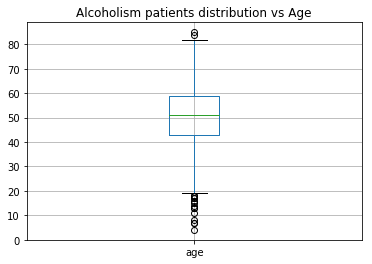

In [57]:
df_alco.boxplot(column=['age']);
plt.title('Alcoholism patients distribution vs Age');

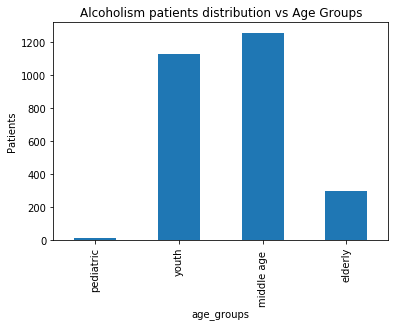

In [58]:
df_alco = df.loc[(df['no_show']==False) & (df['alcoholism']==1)]
df_alco = df_alco.groupby(['age_groups']).count()
df_alco['patient_id'].plot(kind = 'bar');
plt.title('Alcoholism patients distribution vs Age Groups');
plt.ylabel('Patients');

<a id='conclusions'></a>
## Conclusions

> ### Q1 Do scholarships affect patients to show up for their appointment?
> scholarships didnot increase showing up patients
> ### Q2 What is the most day of the week patients show up for an appointment?
> Wednesday and Tuesday are the most days crowded by patients
> ### Q3 What age group showing the most for an appointment?
> The youth group from 14 to 47 are the most age group who showed up
> ### Q4 What neighborhood has the highest medical appointments?
> The most showed up neighborhood "Jardim Camburi"
> ### Q5 Do SMS messages affect patients showing up?
>An unexpected result appeared as there are a decrease in the patients who received the SMS message
>### Q6 Is the difference between scheduling date and appointment date affect how patients showing up?
>Most patients who showed are the patients who scheduled an appointment at the same day
> ### Q7 Is gender is a factor for showing up?
> Female patients are attending more than Male patients but both have the same probability at their gender
>### Q8 do handicapped patients' disabilities affecting their visits?
Handicap patient who has one disability is easier to show up than who has more than one disability
>### Q9 What age group affected more who suffering from diabetes, alcoholism, and hypertension?
>Most patients who suffer from hypertension age range from 50 to 70 mostly middle age group. Most patients who suffer from diabetes age range from 55 to 70 mostly middle-aged & elderly groups. Most patients who suffer from alcoholism age range from 42 to 59 mostly youth & middle-aged groups.

### Limitations
> - To analyse patient neighborhood more information is needed like population density and distance between patient home and medical center.
> - Which patient has the right to have a scholarship? Is it restricted by age, gender, Income, neighborhood or Marital status?
> - More information on handicap. For example Is it physical disability, intellectual disability, vision Impairment, etc

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0